In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt

In [4]:
# parameters
N2 = 1e-5
theta = 0.005
f = 1e-4
Vinf = 0.05
Sinf2 = (N2*theta**2)/f**2
gamma = (1+Sinf2)**(-1)
h = mt.ceil((f*Vinf)/(gamma*N2*theta))
fstar = (f**2+theta**2*N2)**(0.5)
delta = 0.5 
theta1 = 0.0005
Vinf1 = 0.005
Sinf21 = (N2*theta1**2)/f**2
gamma1 = (1+Sinf21)**(-1)
h1 = mt.ceil((f*Vinf1)/(gamma1*N2*theta1))
uo = 0
vo = 0.0002439024390243903#gamma*delta*N2*theta/f
bo = 0#vₒ*(N2*theta1/(f))*0.1

In [5]:
def shear_osc(t):
    u = uo*np.cos(fstar*t)+(f*vo+bo*theta)/(fstar)*np.sin(fstar*t)
    v = (f**2*vo+f*bo*theta)/(fstar**2)*np.cos(fstar*t)-(f*uo)/(fstar)*np.sin(fstar*t)+((fstar**2-f**2)*vo-f*theta*bo)/(fstar**2)
    N = N2*theta*(f*vo+bo*theta)/(fstar**2)*np.cos(fstar*t)-N2*theta*(uo)/(fstar)*np.sin(fstar*t)+bo-N2*theta*(f*vo+theta*bo)/(fstar**2)
    return [u,v,N]

In [6]:
t = np.arange(0,(2*np.pi)/fstar*2,1)
perts = shear_osc(t)

In [7]:
np.where(t==round(0.5*(2*np.pi)/fstar))

(array([31030]),)

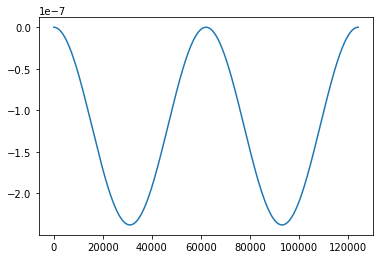

In [8]:
plt.plot(perts[2])
# plt.gca().set_aspect('equal')

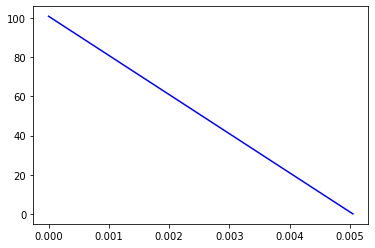

In [25]:
z = np.arange(0,h1+1,1)
# plt.plot(vprofile,z,color="r")
plt.plot(gamma1*theta1*N2/f*(h1-z),z,color="b")

In [22]:
gamma1
Sinf21

0.00025

(99.0, 111.0)

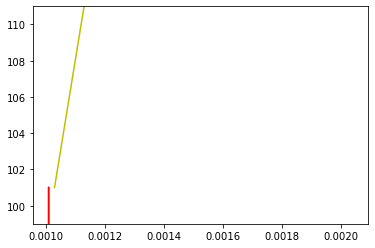

In [28]:
bint = N2*(h+z)+N2*theta1*100
bprofile = N2*z+gamma1*N2*(h1-z)+N2*theta1*100
plt.plot(bint,z+h1,"y")
plt.plot(bprofile,z,c="b")
plt.plot(bprofile+perts[2][0]*(h1-z),z,c="r")
plt.ylim([99,111])